In [117]:
data = {"index": 2, "prediction": "Two brightens is the President of the United States.", "delays": [1500.0, 2000.0, 2500.0, 3000.0, 3500.0, 4000.0, 4500.0, 4620.0, 4620.0], "elapsed": [1689.033031463623, 2373.1889724731445, 3068.427085876465, 3769.9899673461914, 4469.844102859497, 5182.957887649536, 5900.311231613159, 6491.664047241211, 6491.664047241211], "prediction_length": 9, "reference": "Joe Biden is the president of the United States", "source": ["joe_biden.wav", "samplerate: 22050 Hz", "channels: 1", "duration: 4.620 s", "format: WAV (Microsoft) [WAV]", "subtype: Signed 16 bit PCM [PCM_16]"], "source_length": 4620.0}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


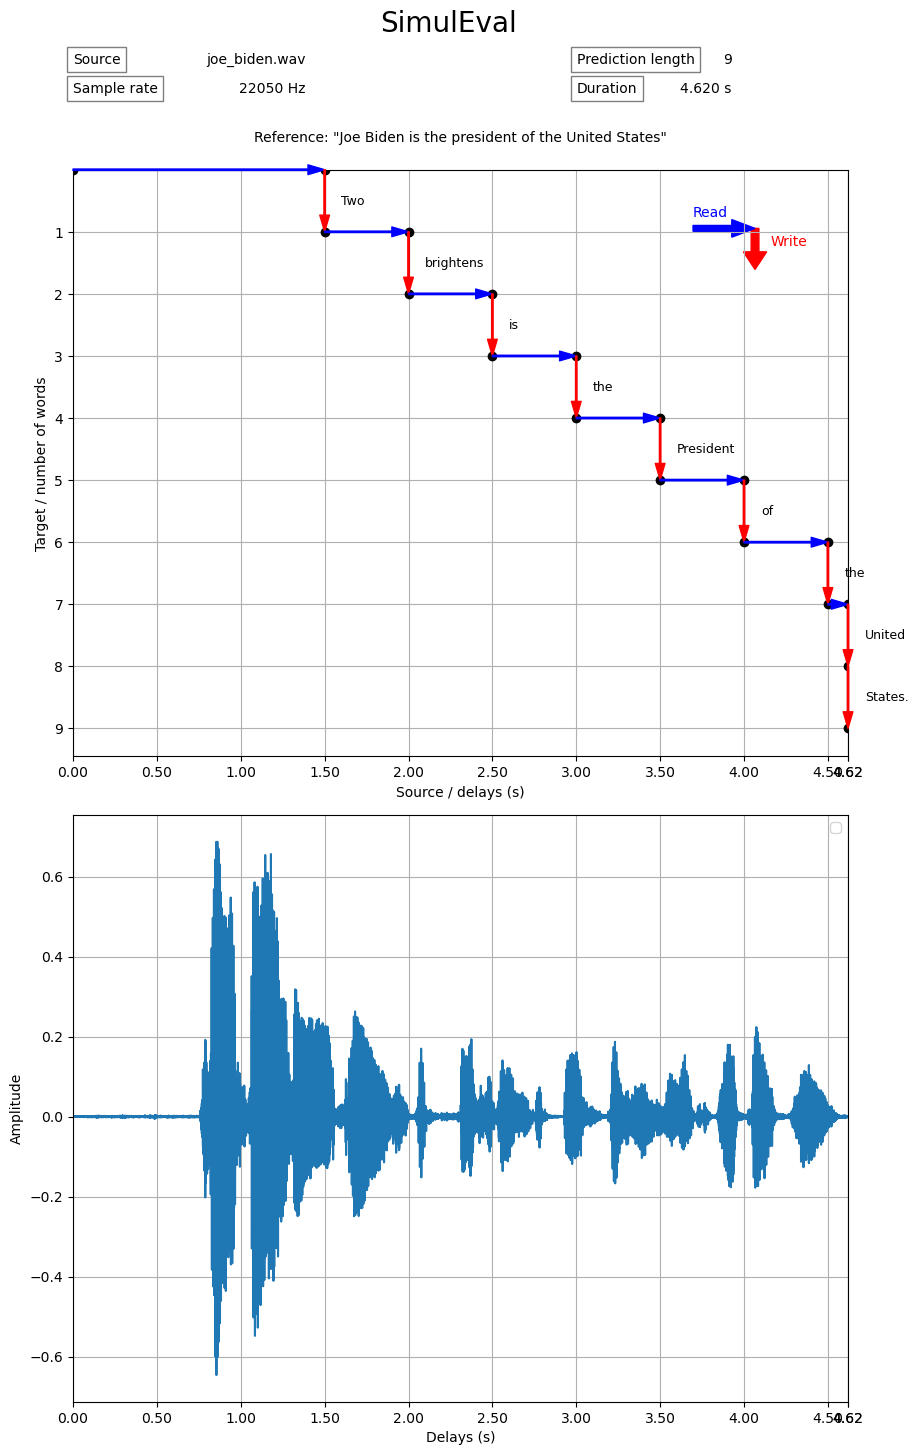

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import soundfile

## 1st PLOT
# Organize all data
words = np.arange(1, data.get("prediction_length", 0) + 1)
delays = [x / 1000 for x in data.get("delays", "N/A delays data")]
data_points = [(delays[i], words[i]) for i in range(len(delays))] # /1000 to make it from ms to s
data_points.insert(0, (0,0))
prediction_word_list = data.get("prediction", "N/A predition data").split(" ")

# Insert points to create the staircase effect
i = 0
while (i < len(data_points) - 1):
    if data_points[i][0] != data_points[i+1][0]:
        data_points.insert(i+1, (data_points[i+1][0], data_points[i][1]))
        i += 2
    else:
        break

# Create a new figure
fig = plt.figure(figsize=(10, 16))
ax1, ax2 = fig.subplots(2,gridspec_kw={'hspace':0.1})

# Plot the points and connect them with lines
x, y = zip(*data_points)
ax1.plot(list(x), list(y), marker='o', color='black')

# Draw arrows between points
red_arrow_indices = []
for i in range(len(data_points) - 1):
    color = 'blue' if y[i] == y[i + 1] else 'red'
    if color == 'red':
        red_arrow_indices.append(i)
    ax1.annotate(
        '',
        xy=(x[i + 1], y[i + 1]),
        xytext=(x[i], y[i]),
        arrowprops=dict(facecolor=color, edgecolor=color, shrink=0, width=1, headwidth=7)
    )

# Annotate blue arrows with words from prediction_word_list
for idx, word in zip(red_arrow_indices, prediction_word_list):
    ax1.text(
        x[idx] + 0.1,  # x position of the annotation
        (y[idx] + y[idx+1]) / 2,  # y position of the annotation
        word,  # text to annotate
        va='center',  # vertical alignment
        fontsize=9,  # font size
        color='black'  # text color
    )

# Custom legend on the right side
legend_x = 0.85  # X-coordinate for the legend in axes coordinates
legend_y = 0.9  # Starting Y-coordinate for the legend

# Red downward arrow
red_arrow = patches.FancyArrow(legend_x + 0.03, legend_y, 0, -0.04, width=0.01, head_width=0.03, head_length=0.03, color='red', transform=ax1.transAxes)
ax1.add_patch(red_arrow)
ax1.text(legend_x + 0.05, legend_y - 0.03, 'Write', color='red', transform=ax1.transAxes)

# Blue rightward arrow
blue_arrow = patches.FancyArrow(legend_x-0.05, legend_y, 0.05, 0, width=0.01, head_width=0.03, head_length=0.03, color='blue', transform=ax1.transAxes)
ax1.add_patch(blue_arrow)
ax1.text(legend_x-0.05, legend_y + 0.02, 'Read', color='blue', transform=ax1.transAxes)

# Flip the y-axis
ax1.invert_yaxis()
# Set the limits of the axes to start at (0,0)
ax1.set_xlim(left=0)
ax1.set_xlim(right=delays[-1])
ax1.set_ylim(top=0)

# Set the grid
ax1.grid(True)

# Add labels and title
ax1.set_xlabel('Source / delays (s)')
ax1.set_ylabel('Target / number of words')
plt.suptitle('SimulEval', fontsize=20)
reference = data.get("reference", "N/A reference data")
subtitle = f"Reference: \"{reference}\""
ax1.set_title(subtitle, fontsize=10, pad=20)
ax1.set_xticks([i * (delays[1]-delays[0]) for i in range(0,round(delays[0]/(delays[1]-delays[0])))] + delays)
ax1.set_yticks(words)

# # Adjust layout to make room for additional text
# plt.subplots_adjust(top=0.75)  # Adjust the top to make space for additional text

# Additional text at the bottom
additional_text = [
    ("Source", data.get("source", "N/A source data")[0]),
    ("Prediction length", data.get("prediction_length", "N/A prediction length")),
    ("Sample rate", data.get("source", "N/A source data")[1].split(":")[1].strip()),
    ("Duration", data.get("source", "N/A source data")[3].split(":")[1].strip())
    ]
start_y = 1.2
line_space = 0.05
for i in range(len(additional_text)):
    if(i % 2 == 0):
        ax1.text(0, start_y, additional_text[i][0], ha='left', va='top', transform=ax1.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
        ax1.text(0.3, start_y, additional_text[i][1], ha='right', va='top', transform=ax1.transAxes, fontsize=10)
    else:
        ax1.text(0.65, start_y, additional_text[i][0], ha='left', va='top', transform=ax1.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
        ax1.text(0.85, start_y, additional_text[i][1], ha='right', va='top', transform=ax1.transAxes, fontsize=10)
        start_y -= line_space

## 2nd PLOT
# Load the audio file data
audio_data, rate = soundfile.read('../joe_biden.wav')
length = audio_data.shape[0] / rate
time = np.linspace(0, length, audio_data.shape[0])

# Make the figure
ax2.set_xlim(left=0)
ax2.set_xlim(right=delays[-1])
ax2.set_xticks([i * (delays[1]-delays[0]) for i in range(0,round(delays[0]/(delays[1]-delays[0])))] + delays)

# Plot the waveform
ax2.plot(time, audio_data)
ax2.legend()
ax2.set_xlabel("Delays (s)")
ax2.set_ylabel("Amplitude")

# Set the grid
ax2.grid(True)

# Show the plot
plt.show()